In [61]:
import sys
import os
sys.path.append(os.path.abspath('../src'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple, Optional, Dict
from sklearn.impute import SimpleImputer
from data.data_processor import LoanDataProcessor

# Set up visualization settings
plt.style.use('seaborn')
sns.set_palette("husl")

/var/folders/q0/7qtgvcgn1sxg_2jgqvvm73wr0000gn/T/ipykernel_93551/1137192936.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [34]:
# Initialize data processor
processor = LoanDataProcessor()
path_to_py = os.path.abspath('../src')
# Load raw training data
df_train = processor.load_data(os.path.join(path_to_py, "data", "training_loan_data.csv"))
# Set the second row as header
df_train.columns = df_train.iloc[0]
# Drop the rows above the header
df_train = df_train[1:].reset_index(drop=True)


/Users/tejovinay/loan-default-prediction/src/data/data_processor.py:27: DtypeWarning: Columns (0,1,2,7,10,11,12,13,14,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(filepath)


## Initial Data Inspection

In [35]:
print("Dataset Shape:", df_train.shape)
print("\nColumns:", df_train.columns.tolist())
print("\nData Types:\n", df_train.dtypes)

Dataset Shape: (199121, 23)

Columns: ['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'emp_length', 'home_ownership', 'annual_inc', 'desc', 'purpose', 'percent_bc_gt_75', 'bc_util', 'dti', 'inq_last_6mths', 'mths_since_recent_inq', 'revol_util', 'total_bc_limit', 'mths_since_last_major_derog', 'tot_hi_cred_lim', 'tot_cur_bal', 'application_approved_flag', 'internal_score', 'bad_flag']

Data Types:
 0
id                             object
member_id                      object
loan_amnt                      object
term                           object
int_rate                       object
emp_length                     object
home_ownership                 object
annual_inc                     object
desc                           object
purpose                        object
percent_bc_gt_75               object
bc_util                        object
dti                            object
inq_last_6mths                 object
mths_since_recent_inq          object
revol_util           

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199121 entries, 0 to 199120
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   id                           199121 non-null  object
 1   member_id                    189457 non-null  object
 2   loan_amnt                    199121 non-null  object
 3   term                         189457 non-null  object
 4   int_rate                     189457 non-null  object
 5   emp_length                   181531 non-null  object
 6   home_ownership               189457 non-null  object
 7   annual_inc                   189457 non-null  object
 8   desc                         82004 non-null   object
 9   purpose                      189457 non-null  object
 10  percent_bc_gt_75             180419 non-null  object
 11  bc_util                      180333 non-null  object
 12  dti                          189457 non-null  object
 13  inq_last_6mths

In [38]:
# Display sample data
print("\nSample Data:")
display(df_train.head())


Sample Data:


,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,...,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,10000001,11983056,7550,36 months,16.24%,3 years,RENT,28000,NaN,debt_consolidation,...,0,17,72%,4000,NaN,3828.953801,5759,1,99,0
1,10000002,12002921,27050,36 months,10.99%,10+ years,OWN,55000,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,...,0,8,61.20%,35700,NaN,34359.94073,114834,1,353,0
2,10000003,11983096,12000,36 months,10.99%,4 years,RENT,60000,Borrower added on 12/31/13 > I would like to...,debt_consolidation,...,1,3,24%,18100,NaN,16416.61776,7137,1,157,0
3,10000004,12003142,28000,36 months,7.62%,5 years,MORTGAGE,325000,NaN,debt_consolidation,...,1,3,54.60%,42200,NaN,38014.14976,799592,1,365,0
4,10000005,11993233,12000,36 months,13.53%,10+ years,RENT,40000,NaN,debt_consolidation,...,0,17,68.80%,7000,53,6471.462236,13605,1,157,0


## Data Quality Analysis

### Missing Values Analysis

In [41]:
missing_values = df_train.isnull().sum()
missing_percentages = (missing_values / len(df_train)) * 100
print("\nMissing Values Analysis:")
display(pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentages
}).sort_values('Missing Percentage', ascending=False))


Missing Values Analysis:


,Missing Values,Missing Percentage
0,,
mths_since_last_major_derog,166372,83.553216
desc,117117,58.817001
mths_since_recent_inq,37649,18.907599
tot_cur_bal,37405,18.785060
bc_util,18788,9.435469
percent_bc_gt_75,18702,9.392279
emp_length,17590,8.833825
tot_hi_cred_lim,17159,8.617373
total_bc_limit,17159,8.617373


### Observations: Missing Values Strategy
- 'mths_since_last_major_derog' (83.55%): High missing rate - create binary flag for presence/absence and fill with -1 to indicate no history of major derogatory marks
- 'desc' (58.81%): Create binary flag 'has_description' and drop original column
- 'mths_since_recent_inq' (18.91%): Fill with -1 (indicating no recent inquiries)
- Most other features have around 4.85% missing values - handle each specifically

### Check unique values in each column

In [42]:
print("\nUnique Values Analysis:")
for column in df_train.columns:
    print(f"\n{column}:")
    print(df_train[column].value_counts().head())
    print(f"Unique values: {df_train[column].nunique()}")


Unique Values Analysis:

id:
id
10049781    2
10050314    2
10050312    2
10050311    2
10050310    2
Name: count, dtype: int64
Unique values: 197787

member_id:
member_id
8765391    2
8868769    2
8744776    2
8764634    2
8764776    2
Name: count, dtype: int64
Unique values: 188123

loan_amnt:
loan_amnt
10000    11957
12000     9116
15000     8827
20000     7555
8000      5637
Name: count, dtype: int64
Unique values: 2164

term:
term
 36 months    144800
 60 months     44657
Name: count, dtype: int64
Unique values: 2

int_rate:
int_rate
12.12%    9408
13.11%    8258
8.90%     7678
14.33%    7208
7.90%     6641
Name: count, dtype: int64
Unique values: 145

emp_length:
emp_length
10+ years    61648
2 years      16257
5 years      14361
3 years      14058
< 1 year     13312
Name: count, dtype: int64
Unique values: 11

home_ownership:
home_ownership
MORTGAGE    97647
RENT        76149
OWN         15573
OTHER          46
NONE           42
Name: count, dtype: int64
Unique values: 5

annua

### Observations: Data Type Issues
- Convert all numerical columns to appropriate types
- Handle percentage values consistently
- Some columns show duplicated values with same value but different type (e.g., '1' and 1)

### Data Consistency Checks

In [43]:
# Check emp_length format
print("\nEmployment Length Unique Values:")
print(df_train['emp_length'].unique())


Employment Length Unique Values:
['3 years' '10+ years' '4 years' '5 years' '2 years' '7 years' '6 years'
 '1 year' '9 years' '< 1 year' '8 years' nan]


**Cleaning Strategy**: Convert employment length to years (0-10) in a numerical scale

In [47]:
# Check percentage columns
print("\nSample values in percentage columns:")
for col in ['int_rate', 'dti', 'percent_bc_gt_75', 'bc_util', 'revol_util']:
    print(f"\n{col}:")
    print(df_train[col].head())


Sample values in percentage columns:

int_rate:
0    16.24%
1    10.99%
2    10.99%
3     7.62%
4    13.53%
Name: int_rate, dtype: object

dti:
0      8.4
1    22.87
2     4.62
3    18.55
4    16.94
Name: dti, dtype: object

percent_bc_gt_75:
0     100
1      25
2       0
3    16.7
4    33.3
Name: percent_bc_gt_75, dtype: object

bc_util:
0      96
1    53.9
2    15.9
3    67.1
4    79.6
Name: bc_util, dtype: object

revol_util:
0       72%
1    61.20%
2       24%
3    54.60%
4    68.80%
Name: revol_util, dtype: object


**Cleaning Strategy**: Remove '%' symbols, convert values to numerical, and divide by 100 to get consistent values between 0 and 1

In [45]:
# Check term values
print("\nTerm values:")
print(df_train['term'].value_counts())


Term values:
term
 36 months    144800
 60 months     44657
Name: count, dtype: int64


In [46]:
# Check application_approved_flag distribution
print("\nApplication Approved Flag Distribution:")
print(df_train['application_approved_flag'].value_counts(normalize=True))


Application Approved Flag Distribution:
application_approved_flag
1    0.835442
1    0.164558
Name: proportion, dtype: float64


### Observations: Feature-specific Handling

**Categorical Features**:
- term: Keep as categorical (2 unique values: 36/60 months)
- home_ownership: Keep as is (5 categories)
- purpose: Keep as is (13 categories)
- emp_length: Convert to numerical (0-10 scale as per dictionary)

**Percentage Features** (need consistent handling):
- int_rate: Remove % symbol and convert to float
- revol_util: Remove % symbol and convert to float
- bc_util: Already numerical for most cases
- percent_bc_gt_75: Already numerical for most cases
- dti: Already numerical for most cases

**Numerical Features**:
- Convert all to float: loan_amnt, annual_inc, inq_last_6mths etc.
- Handle outliers after conversion

**Special Cases**:
- application_approved_flag: Since all values are 1 (approved), we can drop this column as it doesn't provide any discriminatory information
- id and member_id: Drop as they're just identifiers
- internal_score: Keep as numerical feature

### Note
All these decisions from observations to be implemented as functions and added to the data_processor.py and then verified as a continuation in this notebook.

## Data Cleaning

In [69]:
numerical_features = [
    'loan_amnt', 'annual_inc', 'inq_last_6mths',
    'total_bc_limit', 'tot_hi_cred_lim', 'tot_cur_bal',
    'internal_score'
]

percentage_features = [
    'int_rate', 'revol_util', 'bc_util',
    'percent_bc_gt_75', 'dti'
]

categorical_features = [
    'term', 'home_ownership', 'purpose', 'emp_length'
]


In [70]:
data = df_train.copy()
display(data.head())

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,...,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,10000001,11983056,7550,36 months,16.24%,3 years,RENT,28000,NaN,debt_consolidation,...,0,17,72%,4000,NaN,3828.953801,5759,1,99,0
1,10000002,12002921,27050,36 months,10.99%,10+ years,OWN,55000,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,...,0,8,61.20%,35700,NaN,34359.94073,114834,1,353,0
2,10000003,11983096,12000,36 months,10.99%,4 years,RENT,60000,Borrower added on 12/31/13 > I would like to...,debt_consolidation,...,1,3,24%,18100,NaN,16416.61776,7137,1,157,0
3,10000004,12003142,28000,36 months,7.62%,5 years,MORTGAGE,325000,NaN,debt_consolidation,...,1,3,54.60%,42200,NaN,38014.14976,799592,1,365,0
4,10000005,11993233,12000,36 months,13.53%,10+ years,RENT,40000,NaN,debt_consolidation,...,0,17,68.80%,7000,53,6471.462236,13605,1,157,0


Create binary flags for presence of value in 'derog' and 'desc' features

In [71]:
data['has_major_derog'] = data['mths_since_last_major_derog'].notna().astype(int)
data['has_description'] = data['desc'].notna().astype(int)

Special handling for 'mths_since_last_major_derog' and 'mths_since_recent_inq' - fill with -1 to indicate no history of major derogatory marks and no recent inquiries

In [72]:
data['mths_since_last_major_derog'] = data['mths_since_last_major_derog'].fillna(-1)
data['mths_since_recent_inq'] = data['mths_since_recent_inq'].fillna(-1)

Function to handle percentage columns

In [73]:
def clean_percentage(value: str) -> float:
    """Convert percentage string to float."""
    if pd.isna(value):
        return np.nan
    if isinstance(value, (int, float)):
        return value / 100 if value > 1 else value
    return float(str(value).strip('%').strip()) / 100

Handle percentage features

In [74]:
for col in percentage_features:
    data[col] = data[col].apply(clean_percentage)

Convert emp_length to values between 0 and 10 by treating 10+ years as 10 and < 1 year as 0

In [75]:
def clean_emp_length(value: str) -> int:
    """Convert employment length to years (0-10)."""
    if pd.isna(value):
        return np.nan
    value = str(value).lower().strip()
    if '10+' in value:
        return 10
    elif '< 1' in value:
        return 0
    return int(value.split()[0])

In [76]:
data['emp_length'] = data['emp_length'].apply(clean_emp_length)

Convert numerical features

In [77]:
for col in numerical_features:
    data[col] = pd.to_numeric(data[col], errors='coerce')

Drop unnecessary columns

In [78]:
columns_to_drop = ['id', 'member_id', 'desc', 'application_approved_flag']
data = data.drop(columns=columns_to_drop)

Now, in order to handle filling missing values, we look at the features and distributions individually to determine the imputation strategy

In [79]:
def analyze_distributions(df: pd.DataFrame) -> Dict:
    """
    Analyze feature distributions to determine appropriate imputation strategies.
    
    Args:
        df: Input DataFrame
        
    Returns:
        Dictionary with analysis results
    """
    analysis = {}
    for feature in numerical_features + percentage_features:
        if feature in df.columns:
            data = pd.to_numeric(df[feature], errors='coerce')
            analysis[feature] = {
                'mean': data.mean(),
                'median': data.median(),
                'skew': data.skew(),
                'missing_count': data.isna().sum(),
                'missing_pct': (data.isna().sum() / len(data)) * 100
            }
    
    return analysis


Analyze distributions and set up imputers

In [80]:
distributions = analyze_distributions(data)
display(distributions)

{'loan_amnt': {'mean': 14071.947333530868,
  'median': 12000.0,
  'skew': 0.7424915070943456,
  'missing_count': 0,
  'missing_pct': 0.0},
 'annual_inc': {'mean': 72243.3009049019,
  'median': 62000.0,
  'skew': 30.276133461539875,
  'missing_count': 9664,
  'missing_pct': 4.8533303870510895},
 'inq_last_6mths': {'mean': 0.8035490902948954,
  'median': 0.0,
  'skew': 1.4411616697671443,
  'missing_count': 9664,
  'missing_pct': 4.8533303870510895},
 'total_bc_limit': {'mean': 20239.424698563435,
  'median': 14700.0,
  'skew': 2.6205931853354945,
  'missing_count': 17159,
  'missing_pct': 8.617373355899177},
 'tot_hi_cred_lim': {'mean': 20238.38430786893,
  'median': 14637.479485,
  'skew': 2.6376628113745317,
  'missing_count': 17159,
  'missing_pct': 8.617373355899177},
 'tot_cur_bal': {'mean': 137321.45203937768,
  'median': 80760.5,
  'skew': 3.498637413527296,
  'missing_count': 37405,
  'missing_pct': 18.78506034019516},
 'internal_score': {'mean': 183.96795415852674,
  'median': 

**Imputation Strategies based on Stats**: 
- High skew might indicate median is better than mean
- For percentage features, consider the context (typically median might be more robust)
- For features with moderate skew, mean might be appropriate

In [81]:
def determine_imputation_strategy(feature: str, stats: Dict) -> str:
    """
    Determine the best imputation strategy based on feature statistics.
    
    Args:
        feature: Feature name
        stats: Statistics dictionary from analyze_distributions
        
    Returns:
        Strategy string ('mean', 'median', 'constant')
    """
    if feature not in stats:
        return 'median'  # default
        
    # High skew might indicate median is better than mean
    if abs(stats[feature]['skew']) > 1.5:
        return 'median'
    
    # For percentage features, consider the context
    if feature in percentage_features:
        return 'median'  # typically more robust for percentages
        
    # For features with moderate skew, mean might be appropriate
    return 'mean'

In [82]:
# Store imputation strategies
imputers: Dict[str, SimpleImputer] = {}
for feature_list in [numerical_features, percentage_features]:
    for feature in feature_list:
        strategy = determine_imputation_strategy(feature, distributions)
        imputers[feature] = SimpleImputer(strategy=strategy)
        if feature in data.columns:
            imputers[feature].fit(data[[feature]])

# Apply imputation
for feature in numerical_features + percentage_features:
    if feature in data.columns and feature in imputers:
        data[feature] = imputers[feature].transform(data[[feature]])

Handle categorical features

In [83]:
categorical_modes = data[categorical_features].mode().iloc[0]
data[categorical_features] = data[categorical_features].fillna(categorical_modes)

### Test module to validate our preprocessing

In [84]:
# Validation checks

print("\nValidation Checks:")

# Check for missing values
missing = data.isnull().sum()
if missing.any():
    print("\nWarning: Missing values found:")
    print(missing[missing > 0])
else:
    print("\nNo missing values found ✓")

# Check percentage features
for col in percentage_features:
    if col in data.columns:
        values = data[col]
        if (values < 0).any() or (values > 1).any():
            print(f"\nWarning: {col} contains values outside [0,1] range")
        else:
            print(f"\n{col} values are within [0,1] range ✓")

# Check emp_length
if 'emp_length' in data.columns:
    emp_values = data['emp_length']
    if (emp_values < 0).any() or (emp_values > 10).any():
        print("\nWarning: emp_length contains values outside [0,10] range")
    else:
        print("\nemp_length values are within [0,10] range ✓")

# Check categorical features
for col in categorical_features:
    if col in data.columns:
        print(f"\n{col} unique values:", data[col].unique())


# Display sample of processed data
print("\nProcessed Data Sample:")
display(data.head())

# Show summary statistics
print("\nSummary Statistics:")
display(data.describe())


Validation Checks:

0
bad_flag    9664
dtype: int64

int_rate values are within [0,1] range ✓



percent_bc_gt_75 values are within [0,1] range ✓

dti values are within [0,1] range ✓

emp_length values are within [0,10] range ✓

term unique values: [' 36 months' ' 60 months']

home_ownership unique values: ['RENT' 'OWN' 'MORTGAGE' 'NONE' 'OTHER']

purpose unique values: ['debt_consolidation' 'home_improvement' 'credit_card' 'other'
 'major_purchase' 'small_business' 'house' 'moving' 'medical' 'car'
 'vacation' 'renewable_energy' 'wedding']

emp_length unique values: [ 3. 10.  4.  5.  2.  7.  6.  1.  9.  0.  8.]

Processed Data Sample:


,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,percent_bc_gt_75,bc_util,dti,...,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,internal_score,bad_flag,has_major_derog,has_description
0,7550.0,36 months,0.1624,3.0,RENT,28000.0,debt_consolidation,1.000,0.960,0.0840,...,17,0.720,4000.0,-1,3828.953801,5759.0,99.0,0,0,0
1,27050.0,36 months,0.1099,10.0,OWN,55000.0,debt_consolidation,0.250,0.539,0.2287,...,8,0.612,35700.0,-1,34359.940730,114834.0,353.0,0,0,1
2,12000.0,36 months,0.1099,4.0,RENT,60000.0,debt_consolidation,0.000,0.159,0.0462,...,3,0.240,18100.0,-1,16416.617760,7137.0,157.0,0,0,1
3,28000.0,36 months,0.0762,5.0,MORTGAGE,325000.0,debt_consolidation,0.167,0.671,0.1855,...,3,0.546,42200.0,-1,38014.149760,799592.0,365.0,0,0,0
4,12000.0,36 months,0.1353,10.0,RENT,40000.0,debt_consolidation,0.333,0.796,0.1694,...,17,0.688,7000.0,53,6471.462236,13605.0,157.0,0,1,0



Summary Statistics:


,loan_amnt,int_rate,emp_length,annual_inc,percent_bc_gt_75,bc_util,dti,inq_last_6mths,revol_util,total_bc_limit,tot_hi_cred_lim,tot_cur_bal,internal_score,has_major_derog,has_description
count,199121.000000,199121.000000,199121.000000,1.991210e+05,199121.000000,199121.000000,199121.000000,199121.000000,199121.000000,199121.000000,199121.000000,1.991210e+05,199121.000000,199121.000000,199121.000000
mean,14071.947334,0.142734,6.437362,7.174616e+04,0.532400,0.674963,0.172544,0.803549,0.584941,19762.071791,19755.733428,1.266964e+05,183.967954,0.164468,0.411830
std,8067.076636,0.043293,3.580851,5.057998e+04,0.325272,0.246944,0.079062,1.007558,0.224390,18114.816738,18175.157163,1.376268e+05,104.858324,0.370700,0.492166
min,1000.000000,0.060000,0.000000,4.800000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,14.000000,0.000000,0.000000
25%,8000.000000,0.111400,3.000000,4.550000e+04,0.333000,0.526000,0.117300,0.000000,0.436000,8400.000000,8373.857706,3.371300e+04,105.000000,0.000000,0.000000
50%,12000.000000,0.140900,7.000000,6.200000e+04,0.500000,0.722000,0.168500,0.803549,0.605000,14700.000000,14637.479485,8.076050e+04,157.000000,0.000000,0.000000
75%,19600.000000,0.172700,10.000000,8.500000e+04,0.800000,0.875000,0.223200,1.000000,0.757000,24900.000000,24879.507590,1.782620e+05,256.000000,0.000000,1.000000
max,35000.000000,0.260600,10.000000,7.141778e+06,1.000000,3.396000,1.000000,8.000000,1.404000,522210.000000,520643.298200,8.000078e+06,456.000000,1.000000,1.000000


### Observations:
- There are missing values in the target variable. It is better to remove those rows as they consist of a small portion. Removing those rows first might also reduce nulls in other features.
- Check for any dependencies between features instead of following a complete statistical approach to fill missing values. For example, there could be some relation between "mths_since_recent_inq" and "inq_last_6mths" which can help fill missing values. So, its better to take a second look and understand the context of each feature to understand if they should be imputed differently.

### Analyze inquiry related features
- Assumption is that if mths_since_recent_inq is null, there were no inquiries ever, so inq_last_6mths should be 0


Analysis of inquiry-related features:

Missing values:
inq_last_6mths: 0
mths_since_recent_inq: 27985

Cases where inq_last_6mths = 0:


,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,...,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,10000001,11983056,7550,36 months,16.24%,3 years,RENT,28000,NaN,debt_consolidation,...,0,17,72%,4000,NaN,3828.953801,5759,1,99,0
1,10000002,12002921,27050,36 months,10.99%,10+ years,OWN,55000,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,...,0,8,61.20%,35700,NaN,34359.94073,114834,1,353,0
4,10000005,11993233,12000,36 months,13.53%,10+ years,RENT,40000,NaN,debt_consolidation,...,0,17,68.80%,7000,53,6471.462236,13605,1,157,0
5,10000006,11973235,11500,60 months,22.90%,4 years,RENT,32760,Borrower added on 12/31/13 > This loan is fo...,debt_consolidation,...,0,14,70.90%,9000,NaN,9750.303073,24724,1,151,0
7,10000008,12013252,10000,36 months,9.67%,7 years,MORTGAGE,102000,NaN,debt_consolidation,...,0,8,44.40%,9200,54,9401.851428,39143,1,131,0


mths_since_recent_inq
7     1788
8     1457
9     1325
10    1134
11    1063
Name: count, dtype: int64

Cases where mths_since_recent_inq is null:
inq_last_6mths
0      21060
0       3098
1.0     2251
2.0     1008
3.0      500
Name: count, dtype: int64

Cases where both features were null:


,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,...,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag



Cross-tabulation of both features:
mths_since_recent_inq   False   True     All
inq_last_6mths                              
0                       58910  21060   79970
1                       41917   2251   44168
2                       19385   1008   20393
3                        8907    500    9407
4                        1802     33    1835
5                         573     23     596
6                         293      8     301
7                          10      3      13
8                           6      1       7
0                       13450   3098   16548
1                        9286      0    9286
2                        4315      0    4315
3                        1870      0    1870
4                         524      0     524
5                         176      0     176
6                          48      0      48
All                    161472  27985  189457


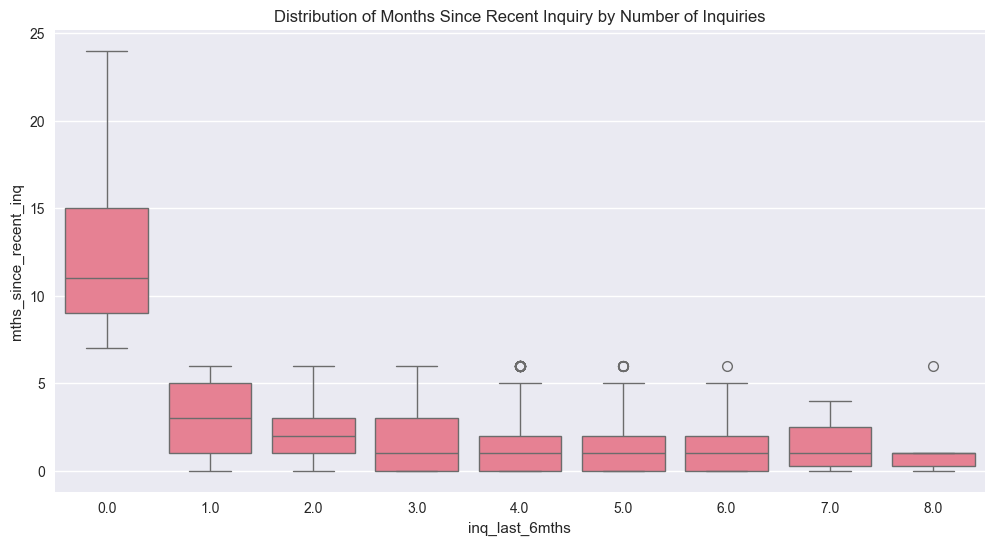

In [91]:
data = df_train.copy()
# Let's analyze inquiry-related features
print("\nAnalysis of inquiry-related features:")

# Drop rows where bad_flag is null
data = data.dropna(subset=['bad_flag'])

# display(data.head())

# Check missing values
print("\nMissing values:")
print("inq_last_6mths:", data['inq_last_6mths'].isna().sum())
print("mths_since_recent_inq:", data['mths_since_recent_inq'].isna().sum())

# Look at the relationship between these features
print("\nCases where inq_last_6mths = 0:")
display(data[data['inq_last_6mths'] == '0'].head())
print(data[data['inq_last_6mths'] == '0']['mths_since_recent_inq'].value_counts().head())

print("\nCases where mths_since_recent_inq is null:")
print(data[data['mths_since_recent_inq'].isna()]['inq_last_6mths'].value_counts().head())

print("\nCases where both features were null:")
display(data[data['mths_since_recent_inq'].isna() & data['inq_last_6mths'].isna()].head())

# Create a cross-tabulation
print("\nCross-tabulation of both features:")
cross_tab = pd.crosstab(data['inq_last_6mths'], 
                       pd.isna(data['mths_since_recent_inq']), 
                       margins=True)
print(cross_tab)

for col in ['inq_last_6mths', 'mths_since_recent_inq']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Distribution of mths_since_recent_inq for different inq_last_6mths values
plt.figure(figsize=(12, 6))
sns.boxplot(x='inq_last_6mths', y='mths_since_recent_inq', data=data)
plt.title('Distribution of Months Since Recent Inquiry by Number of Inquiries')
plt.show()

From this analysis of the inquiry features after dropping missing bad_flag rows, we can observe:

**Missing Values Pattern**:

- inq_last_6mths has no null values 
- mths_since_recent_inq has 27,985 null values
- There are no cases where both features are null


**Key Relationships**:

When inq_last_6mths = 0, there are two scenarios:

- Many cases have valid mths_since_recent_inq values (indicating past inquiries beyond 6 months)
- Some cases (21,060) have null mths_since_recent_inq



**Distribution Pattern (from boxplot)**:

- As inq_last_6mths increases, mths_since_recent_inq tends to decrease
- When inq_last_6mths = 0, mths_since_recent_inq has the highest median and widest spread
- This makes sense: fewer recent inquiries correlate with more months since the last inquiry



Based on this analysis, strategy to handle these features:

For mths_since_recent_inq null values:
- If inq_last_6mths = 0 and mths_since_recent_inq is null, we can assume no inquiry history
- For other cases with inquiries, we should impute based on the corresponding inq_last_6mths group

In [92]:
def handle_inquiry_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Handle missing values in mths_since_recent_inq based on inq_last_6mths:
    - For cases with inq_last_6mths = 0 and null mths_since_recent_inq: 
      assume no inquiry history, set to a large value (e.g., 999)
    - For other cases: impute based on the corresponding inq_last_6mths group
    """
    df = df.copy()
    
    # First case: no inquiries in last 6 months and null mths_since_recent_inq
    mask_no_inquiry = (df['inq_last_6mths'] == 0) & (df['mths_since_recent_inq'].isna())
    df.loc[mask_no_inquiry, 'mths_since_recent_inq'] = 999  # indicating no inquiry history
    
    # Second case: has inquiries but missing mths_since_recent_inq
    mask_has_inquiry = (df['inq_last_6mths'] > 0) & (df['mths_since_recent_inq'].isna())
    
    # Fill with median of corresponding inq_last_6mths group
    group_medians = df.groupby('inq_last_6mths')['mths_since_recent_inq'].median()
    df.loc[mask_has_inquiry, 'mths_since_recent_inq'] = df.loc[mask_has_inquiry, 'inq_last_6mths'].map(group_medians)
    
    return df

# Let's test it
df_processed = handle_inquiry_features(data)

# Verify results
print("Original missing values:", data['mths_since_recent_inq'].isna().sum())
print("After processing missing values:", df_processed['mths_since_recent_inq'].isna().sum())

# Let's look at the distribution after processing
for inq_count in sorted(df_processed['inq_last_6mths'].unique()):
    print(f"\ninq_last_6mths = {inq_count}")
    print("mths_since_recent_inq statistics:")
    print(df_processed[df_processed['inq_last_6mths'] == inq_count]['mths_since_recent_inq'].describe())

Original missing values: 27985
After processing missing values: 0

inq_last_6mths = 0.0
mths_since_recent_inq statistics:
count    96518.000000
mean       259.298027
std        427.423727
min          7.000000
25%          9.000000
50%         14.000000
75%        999.000000
max        999.000000
Name: mths_since_recent_inq, dtype: float64

inq_last_6mths = 1.0
mths_since_recent_inq statistics:
count    53454.000000
mean         3.125753
std          1.931413
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: mths_since_recent_inq, dtype: float64

inq_last_6mths = 2.0
mths_since_recent_inq statistics:
count    24708.000000
mean         2.200907
std          1.718817
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: mths_since_recent_inq, dtype: float64

inq_last_6mths = 3.0
mths_since_recent_inq statistics:
count    11277.000000
mean         1.720848
std   

Looking at the results, a few observations and potential improvements:

**For inq_last_6mths = 0**:
- The statistics show a mean of 259 and median of 14
- 75th percentile is 999 (our imputed value)
- This indicates our imputed value of 999 might be too extreme and could skew the data, perhaps we should use a more reasonable value based on the actual distribution
- For inq_last_6mths = 0 and null mths_since_recent_inq, use the median of existing values where inq_last_6mths = 0


**For inq_last_6mths > 0**:
- The median values decrease as the number of inquiries increases
- This makes sense: more recent inquiries mean less time since the last inquiry
- The imputation appears to maintain this pattern

In [93]:
def handle_inquiry_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Handle missing values in mths_since_recent_inq based on inq_last_6mths:
    - For cases with inq_last_6mths = 0 and null mths_since_recent_inq: 
      use the median of non-null values where inq_last_6mths = 0
    - For other cases: impute based on the corresponding inq_last_6mths group
    """
    df = df.copy()
    
    # First case: no inquiries in last 6 months and null mths_since_recent_inq
    mask_no_inquiry = (df['inq_last_6mths'] == 0) & (df['mths_since_recent_inq'].isna())
    no_inq_median = df[(df['inq_last_6mths'] == 0) & (df['mths_since_recent_inq'].notna())]['mths_since_recent_inq'].median()
    df.loc[mask_no_inquiry, 'mths_since_recent_inq'] = no_inq_median
    
    # Second case: has inquiries but missing mths_since_recent_inq
    mask_has_inquiry = (df['inq_last_6mths'] > 0) & (df['mths_since_recent_inq'].isna())
    group_medians = df.groupby('inq_last_6mths')['mths_since_recent_inq'].median()
    df.loc[mask_has_inquiry, 'mths_since_recent_inq'] = df.loc[mask_has_inquiry, 'inq_last_6mths'].map(group_medians)
    
    return df

# Let's test it
df_processed = handle_inquiry_features(data)

# Verify results
print("Original missing values:", data['mths_since_recent_inq'].isna().sum())
print("After processing missing values:", df_processed['mths_since_recent_inq'].isna().sum())

# Let's look at the distribution after processing
for inq_count in sorted(df_processed['inq_last_6mths'].unique()):
    print(f"\ninq_last_6mths = {inq_count}")
    print("mths_since_recent_inq statistics:")
    print(df_processed[df_processed['inq_last_6mths'] == inq_count]['mths_since_recent_inq'].describe())

Original missing values: 27985
After processing missing values: 0

inq_last_6mths = 0.0
mths_since_recent_inq statistics:
count    96518.000000
mean        12.006289
std          3.976152
min          7.000000
25%          9.000000
50%         11.000000
75%         14.000000
max         24.000000
Name: mths_since_recent_inq, dtype: float64

inq_last_6mths = 1.0
mths_since_recent_inq statistics:
count    53454.000000
mean         3.125753
std          1.931413
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: mths_since_recent_inq, dtype: float64

inq_last_6mths = 2.0
mths_since_recent_inq statistics:
count    24708.000000
mean         2.200907
std          1.718817
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: mths_since_recent_inq, dtype: float64

inq_last_6mths = 3.0
mths_since_recent_inq statistics:
count    11277.000000
mean         1.720848
std   

For inq_last_6mths = 0:

The distribution now looks more natural
- Mean: ~12 months
- Range: 7-24 months
- No more extreme values like 999
- Standard deviation (~4) indicates reasonable spread


For inq_last_6mths > 0:

We see a clear decreasing trend in the means as inquiries increase:
- 1 inquiry: mean ~3.13 months
- 2 inquiries: mean ~2.20 months
- 3 inquiries: mean ~1.72 months
And so on...

This pattern makes logical sense: more inquiries correlate with less time since last inquiry


Overall:

- All missing values have been handled (27,985 → 0)
- The distributions look reasonable for each group
- The relationships between variables are preserved
- No extreme values that could skew our analysis


In [94]:
# Let's examine the percentage features more closely
percentage_features = ['int_rate', 'revol_util', 'bc_util', 'percent_bc_gt_75', 'dti']

print("Analysis of percentage features:")
for col in percentage_features:
    print(f"\n{col}:")
    print("Sample values:", data[col].head())
    print("Unique values count:", data[col].nunique())
    print("Missing values:", data[col].isna().sum())
    print("Data type:", data[col].dtype)
    
    # Show some statistics if numeric
    try:
        numeric_values = pd.to_numeric(data[col].str.rstrip('%') if data[col].dtype == 'object' else data[col], errors='coerce')
        print("\nStatistics after converting to numeric:")
        print(numeric_values.describe())
    except:
        print("Could not convert to numeric for statistics")

Analysis of percentage features:

int_rate:
Sample values: 0    16.24%
1    10.99%
2    10.99%
3     7.62%
4    13.53%
Name: int_rate, dtype: object
Unique values count: 145
Missing values: 0
Data type: object

Statistics after converting to numeric:
count    189457.000000
mean         14.282718
std           4.438100
min           6.000000
25%          11.140000
50%          14.090000
75%          17.270000
max          26.060000
Name: int_rate, dtype: float64

revol_util:
Sample values: 0       72%
1    61.20%
2       24%
3    54.60%
4    68.80%
Name: revol_util, dtype: object
Unique values count: 1068
Missing values: 127
Data type: object

Statistics after converting to numeric:
count    189330.000000
mean         58.390322
std          23.007160
min           0.000000
25%          42.500000
50%          60.500000
75%          76.600000
max         140.400000
Name: revol_util, dtype: float64

bc_util:
Sample values: 0      96
1    53.9
2    15.9
3    67.1
4    79.6
Name: bc_util, dt

**Note**: Data inspection done and got insight into how to approach cleaning the data feature by feature in a more systematic approach. Data Cleaning to be done in 01_eda_data_cleaning.ipynb
## --- END OF NOTEBOOK ---